### Simple anomaly detection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

In [4]:
df = pd.read_excel("Sample - Superstore.xls")
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
df.shape[0]

9994

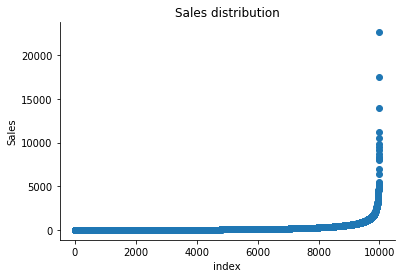

In [12]:
plt.scatter(range(df.shape[0]), np.sort(df['Sales'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Sales distribution")
sns.despine()

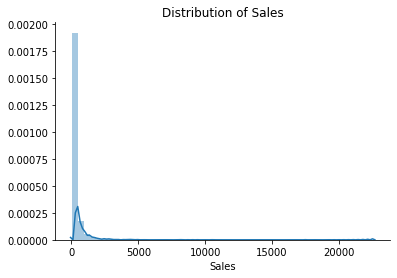

In [13]:
sns.distplot(df['Sales'])
plt.title("Distribution of Sales")
sns.despine()

In [14]:
print("Skewness: %f" % df['Sales'].skew())
print("Kurtosis: %f" % df['Sales'].kurt()) # the peak

Skewness: 12.972752
Kurtosis: 305.311753


In [36]:
from scipy import stats
#mean value
mean= np.mean(df['Sales'].values)

#median value
median = np.median(df['Sales'].values)

#mode value
mode= stats.mode(df['Sales'].values)

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)


Mean:  229.85800083049833
Median:  54.489999999999995
Mode:  ModeResult(mode=array([12.96]), count=array([56]))


In [41]:
df[df['Sales'].values>12.9].Sales.nunique

<bound method IndexOpsMixin.nunique of 0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales, Length: 8162, dtype: float64>

In [42]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In [43]:
df['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

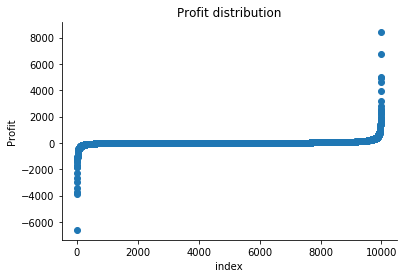

In [44]:
plt.scatter(range(df.shape[0]), np.sort(df['Profit'].values))
plt.xlabel('index')
plt.ylabel('Profit')
plt.title("Profit distribution")
sns.despine()

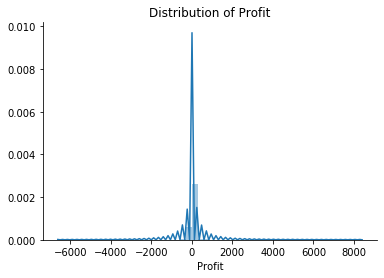

In [45]:
sns.distplot(df['Profit'])
plt.title("Distribution of Profit")
sns.despine()

In [46]:
print("Skewness: %f" % df['Profit'].skew())
print("Kurtosis: %f" % df['Profit'].kurt())

Skewness: 7.561432
Kurtosis: 397.188515


In [47]:
#mean value
mean= np.mean(df['Profit'].values)

#median value
median = np.median(df['Profit'].values)

#mode value
mode= stats.mode(df['Profit'].values)

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)

Mean:  28.656896307784663
Median:  8.666499999999996
Mode:  ModeResult(mode=array([0.]), count=array([65]))


### IsolationForest using the Sales data.

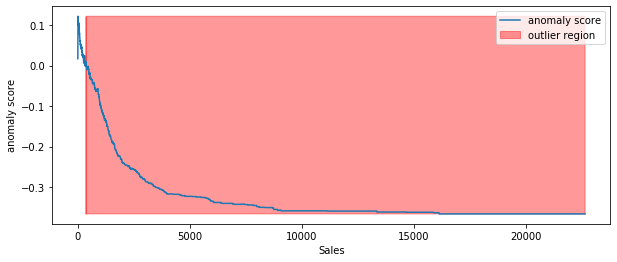

In [49]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['Sales'].values.reshape(-1, 1))
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

According to the above results and visualization, It seems that Sales that exceeds 1000 would be definitely considered as an outlier.